In [17]:
from vessel_models import VesselModel
import numpy as np
import matplotlib.pyplot as plt

{'X_u': -0.8787814172157381, 'X_uu': -2.261401370023905, 'Y_v': -0.8029682820956796, 'Y_vv': -70.35506482154538, 'Y_r': 0.8056197251118489, 'N_v': 0.8427437724131522, 'N_r': -0.6850951899654834, 'N_rr': -1.5460911003480429, 'X_du': -2.980036300296953, 'Y_dv': -16.61320045653712, 'Y_dr': 0.25526612689841033, 'N_dv': 0.8116162395263311, 'N_dr': -0.9770408770424551, 'm': 42.716813498044615, 'I_z': 3.624909140133448, 'x_g': 0.31085493038188383}


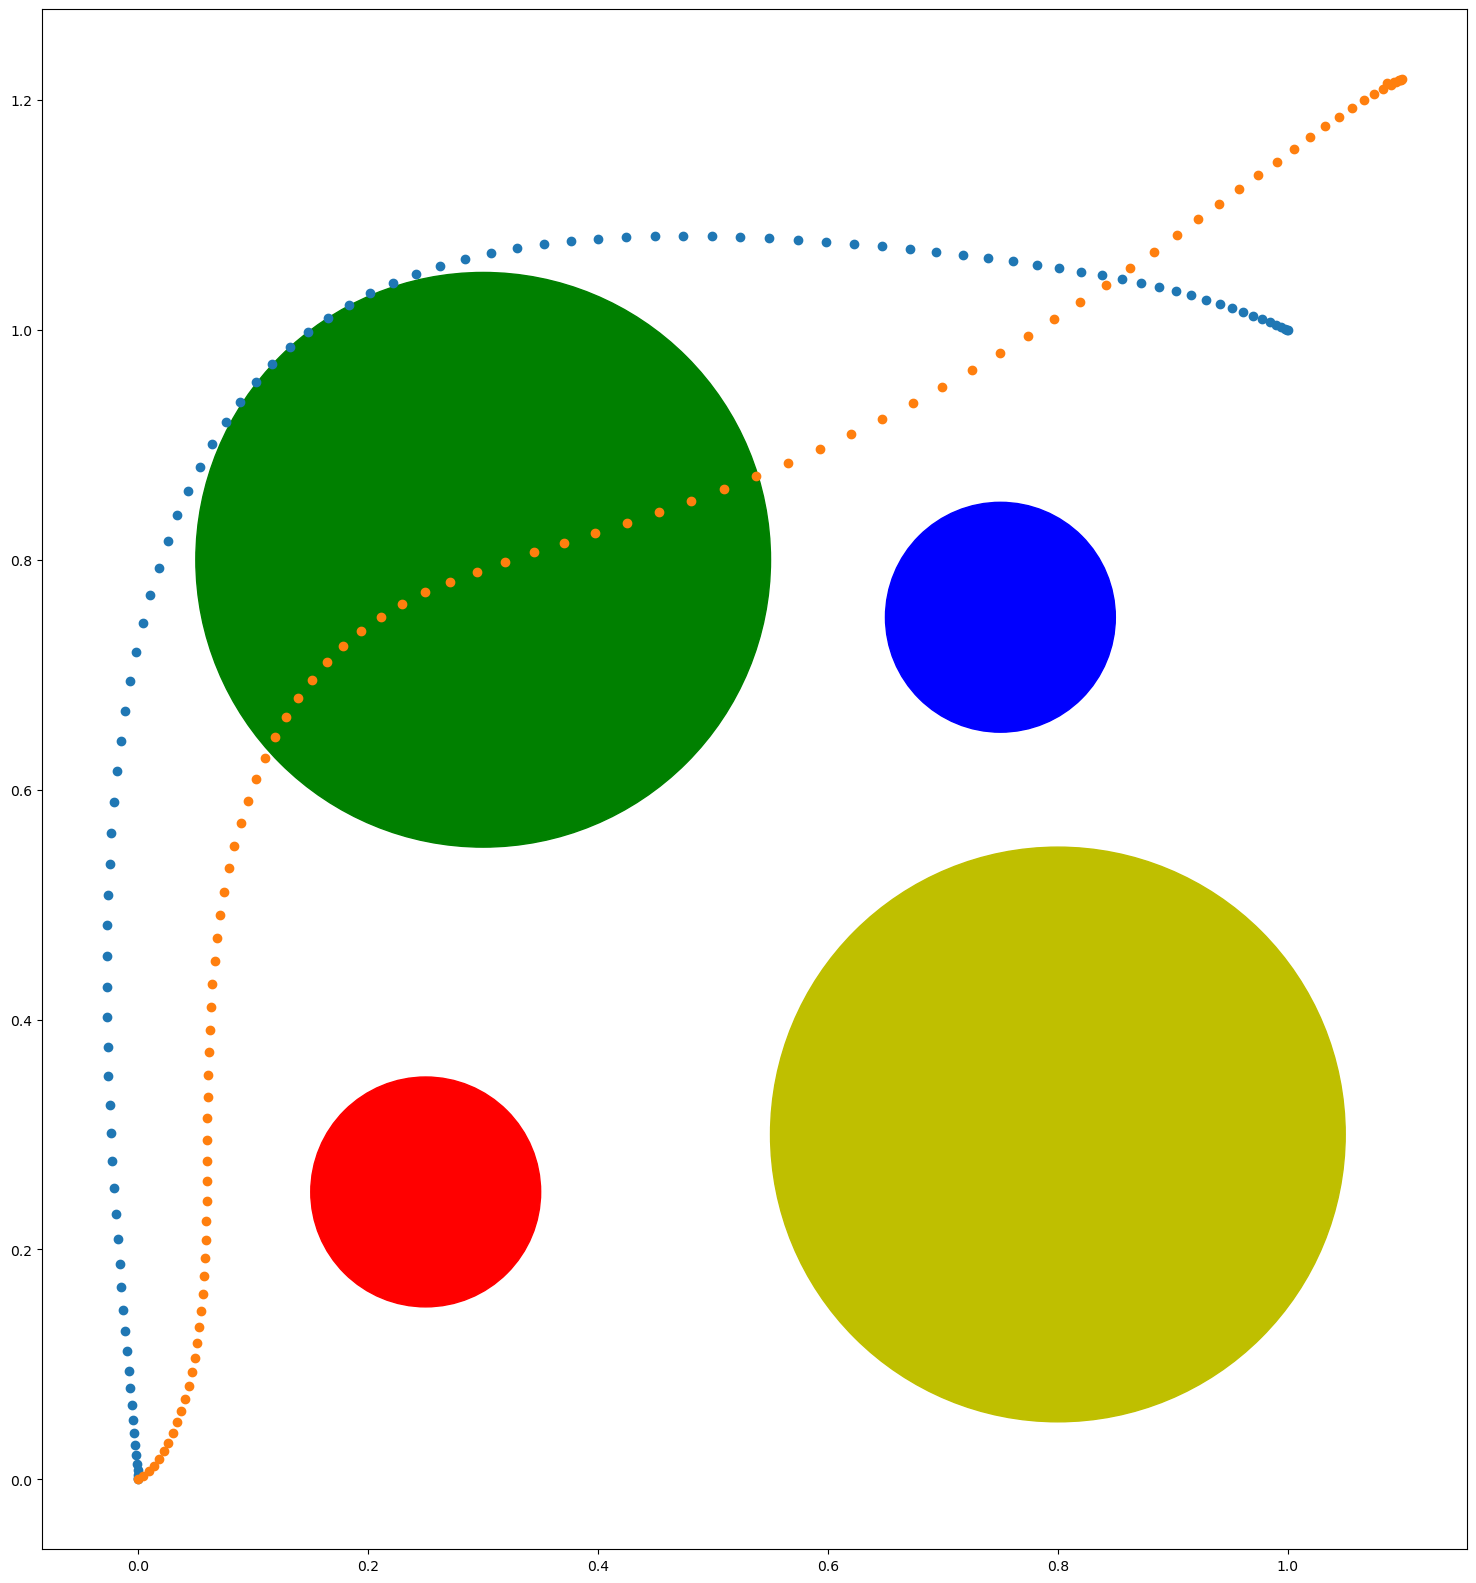

In [18]:
N = 100
dt = 0.1
ns = 6
nu = 3
nc = 13

Sref = np.loadtxt('dircol_soln.csv', delimiter=',')
Uref = np.loadtxt('dircol_inpu.csv', delimiter=',')
Sfwd = np.zeros((N, ns))
Sfwd[0] = Sref[0]

model = VesselModel(mismatch=True)

for i in range(N-1):
    sn = Sfwd[i]
    un = Uref[i]
    Sfwd[i+1] = model.rk4_addvel(sn, un, dt)

ps = Sfwd.T
ps_ref = Sref.T
fig, axes = plt.subplots(1, 1, figsize=(20, 20))
circle1 = plt.Circle((0.25, 0.25), 0.1, color='r')
circle2 = plt.Circle((0.3, 0.8), 0.25, color='g')
circle3 = plt.Circle((0.75, 0.75), 0.1, color='b')
circle4 = plt.Circle((0.8, 0.3), 0.25, color='y')
axes.add_patch(circle1)
axes.add_patch(circle2)
axes.add_patch(circle3)
axes.add_patch(circle4)
axes.scatter(ps_ref[1], ps_ref[0])
axes.scatter(ps[1], ps[0])
axes.set_aspect('equal', adjustable='box')
plt.show()

np.savetxt("gen_soln_current_mismatch.csv", Sfwd, delimiter=",")